# Part I - (Dataset Exploration Title)
## by Mofeoluwa Jide-Jegede

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df=pd.read_csv("201902-fordgobike-tripdata.csv")

### What is the structure of your dataset?

The dataset for this analysis has 183412 rows and 16 columns.

In [3]:
df.shape

(183412, 16)

### What is/are the main feature(s) of interest in your dataset?

The main features of this dataset are the duration(in seconds), the start time, end time, station names, bike id's, user type, member birth year and member gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
sum(df.duplicated())

0

## Data Cleaning

In [8]:
#made a copy of the data for cleaning
ford_data= df.copy()

In [9]:
#delete columns that are not needed for analysis 
del_col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']

In [10]:
#deleting the columns from the database
ford_data = ford_data.drop(del_col, axis = 1)

In [11]:
#check for null values in the dataset
ford_data.isnull().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
bike_id                  0
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

In [12]:
#store columns with NaN values into an array
stations=['start_station_id','start_station_name', 'end_station_id', 'end_station_name','member_birth_year','member_gender']

In [13]:
#drop rows with NaN values 
ford_data.dropna(subset = stations, inplace = True)

In [14]:
#confirm if there are no null values in any of the colums
ford_data.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [15]:
#convert start and end time data type to datetime
ford_data.start_time = pd.to_datetime(ford_data.start_time)
ford_data.end_time = pd.to_datetime(ford_data.end_time)

In [16]:
# create new columns from start_time and end time
ford_data['start_weekday'] = ford_data.start_time.dt.weekday 
ford_data['start_hour'] = ford_data.start_time.dt.hour
ford_data['start_month'] = ford_data.start_time.dt.month_name()



ford_data['end_weekday'] = ford_data.end_time.dt.weekday 
ford_data['end_hour'] = ford_data.end_time.dt.hour
ford_data['end_month'] = ford_data.end_time.dt.month_name()



In [17]:
# convert seconds to minutes
ford_data['duration_minutes'] = ford_data['duration_sec']/60

In [18]:
# convert birth year to Age as at 2019
ford_data['Age'] = 2019 - ford_data['member_birth_year']

In [19]:
#Converting the datatype of the following columns

datatype= { 'start_station_id': 'object',
             'end_station_id': 'object',
            'bike_id': 'object',
            'user_type': 'category',
              'start_weekday': 'object',
           'end_weekday':'object',
           'Age': 'int',
           'duration_minutes':'int'
          }


ford_data = ford_data.astype(datatype)

In [20]:
#confirm the datatype and location of each column
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  object        
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  object        
 6   end_station_name    174952 non-null  object        
 7   bike_id             174952 non-null  object        
 8   user_type           174952 non-null  category      
 9   member_birth_year   174952 non-null  float64       
 10  member_gender       174952 non-null  object        
 11  start_weekday       174952 non-null  object        
 12  start_hour          174952 non-null  int64         
 13  start_month         174952 no

In [21]:
ford_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_weekday,start_hour,start_month,end_weekday,end_hour,end_month,duration_minutes,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,3,17,February,4,8,March,869,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,3,12,February,4,5,March,1030,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,3,17,February,4,4,March,608,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,3,23,February,4,0,March,26,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,3,23,February,4,0,March,29,60


In [22]:
#In Pandas, it is assumed the day of the week starts with Monday=0 to Sunday=6.
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [23]:
ford_data['start_weekday'] = ford_data['start_weekday'].map(dmap)

In [24]:
ford_data['end_weekday'] = ford_data['end_weekday'].map(dmap)

In [25]:
#For this analytics, hours before noon would be considered morning, from noon to 18:00 is afternoon 
#from then to 12:00am is evening
ford_data['start_hour'] = (ford_data['start_hour'] % 24 + 4) // 4
ford_data['start_hour'].replace({1: 'Late Night',
               2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)


In [26]:
ford_data['end_hour'] = (ford_data['end_hour'] % 24 + 4) // 4
ford_data['end_hour'].replace({1: 'Late Night',
                    2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)



In [27]:
ford_data['Age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: Age, dtype: float64

In [28]:
#delete columns that are not needed for analysis 
del_col2 = ['duration_sec', 'start_time', 'end_time', 'member_birth_year']

In [29]:
#deleting the columns from the database
ford_data = ford_data.drop(del_col2, axis = 1)

In [30]:
ford_data = ford_data.reindex(['bike_id',
                               'start_station_id',
                               'start_station_name',
                               'end_station_id',
                               'end_station_name',
                                'duration_minutes',
                               'start_month',
                               'end_month',
                               'start_weekday',
                               'end_weekday',
                               'start_hour',
                              'end_hour',
                               'user_type',
                               'member_gender',
                               'Age'
                               
                              ], axis=1)

In [31]:
ford_data.head()

,bike_id,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_month,end_month,start_weekday,end_weekday,start_hour,end_hour,user_type,member_gender,Age
0,4902,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,869,February,March,Thursday,Friday,Evening,Morning,Customer,Male,35
2,5905,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),1030,February,March,Thursday,Friday,Noon,Early Morning,Customer,Male,47
3,6638,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,608,February,March,Thursday,Friday,Evening,Early Morning,Subscriber,Other,30
4,4898,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,26,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,45
5,5200,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,29,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,60


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [32]:
base_color= sb.color_palette()[0]

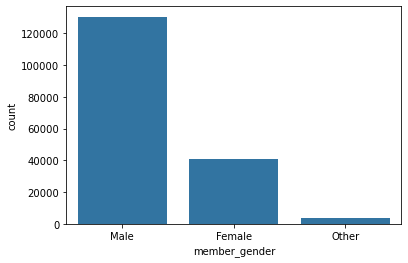

In [33]:
#plot of member_gender column
sb.countplot(data= ford_data, 
             x='member_gender',
             color=base_color, 
             order= ['Male','Female','Other']);


In [42]:
#for the purpose of this analysis, i would drop the other column
Other = ford_data[ ford_data['member_gender'] == 'Other' ].index
  
# drop these row indexes from dataFrame
ford_data.drop(Other, inplace = True)


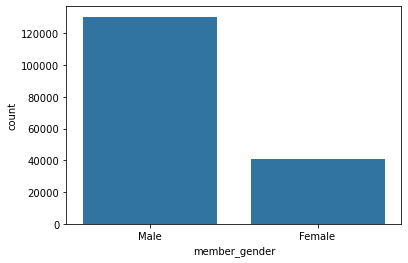

In [44]:
#confirm new plot of member_gender column
sb.countplot(data= ford_data, 
             x='member_gender',
             color=base_color, );



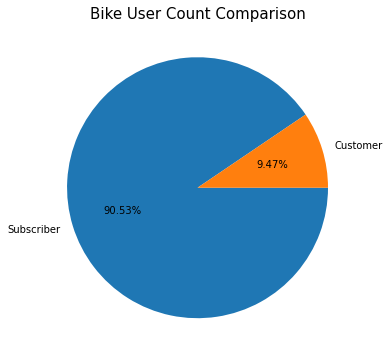

In [72]:
#pie chart of user type
plt.figure(figsize=(10,6))
sc = ford_data['user_type'].value_counts()
plt.pie(sc, labels = sc.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');
#plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);


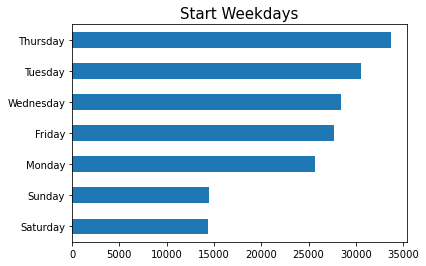

In [64]:
#plot of weekdays bike trips started
plt.title('Weekdays Distribution', fontsize=15)
ford_data.start_weekday.value_counts(ascending=True).plot.barh();


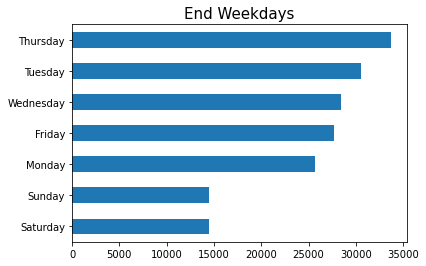

In [63]:
#plot of weekdays bike trips ended
plt.title('End Weekdays', fontsize=15)
ford_data.end_weekday.value_counts(ascending=True).plot.barh();



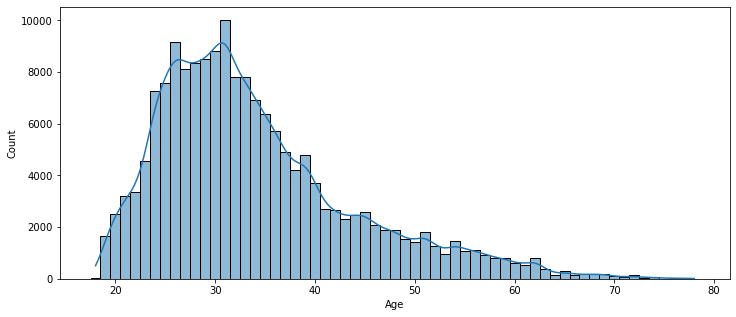

In [58]:
#histogram of Age distribution
plt.figure(figsize = [12, 5])

sb.histplot(ford_data, x="Age", 
           binwidth=20, bins=20, discrete=True, kde=True);


In [51]:
#drop ages above 80
age_drop = ford_data[ (ford_data['Age'] >= 80)].index
  
# drop these given row indexes from dataFrame
ford_data.drop(age_drop, inplace = True)


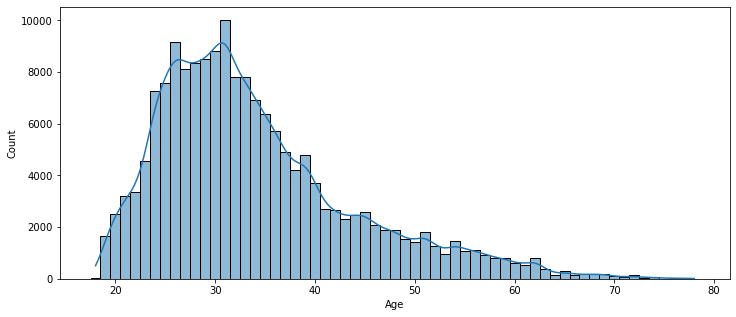

In [62]:
#confirm if ages above 80 has been dropped
plt.figure(figsize = [12, 5])

sb.histplot(ford_data, x="Age", 
           binwidth=20, bins=20, discrete=True, kde=True);

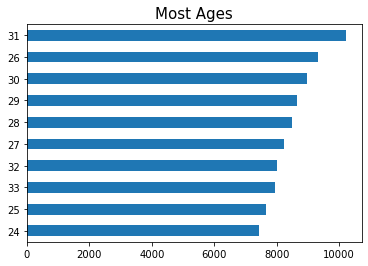

In [43]:
#to be more specific the top 10 most common ages
plt.title('Most Ages', fontsize=15)
ford_data.Age.value_counts(ascending=True).tail(10).plot.barh();


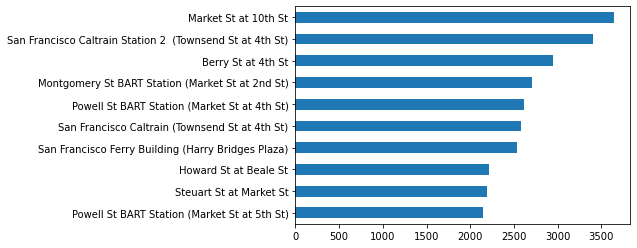

In [46]:
#top 10 stations for start of trips
ford_data.start_station_name.value_counts(ascending=True).tail(10).plot.barh();


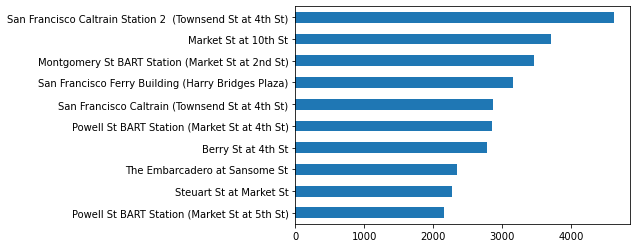

In [47]:
#top 10 stations for end of trips
ford_data.end_station_name.value_counts(ascending=True).tail(10).plot.barh();



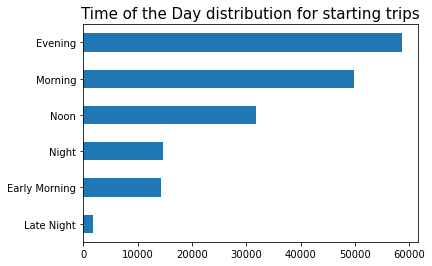

In [55]:
plt.title('Time of the Day distribution for starting trips', fontsize=15)
ford_data.start_hour.value_counts(ascending=True).plot.barh();




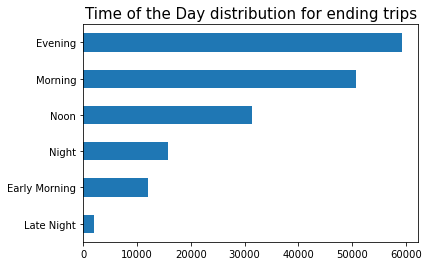

In [56]:
plt.title('Time of the Day distribution for ending trips', fontsize=15)
ford_data.end_hour.value_counts(ascending=True).plot.barh();



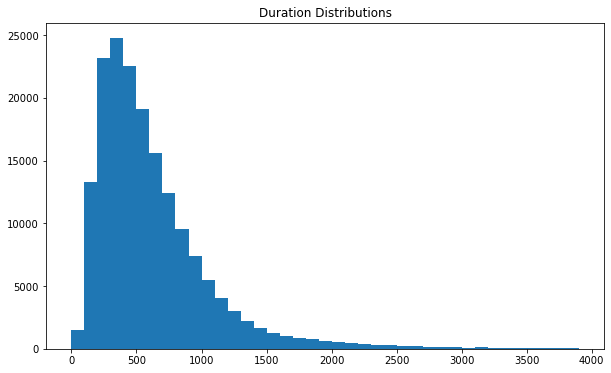

In [81]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 4000, 100)

plt.hist(ford_data.duration_sec, bins=bins)
plt.title('Duration Distributions');


In [63]:
ford_data

,bike_id,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_month,end_month,start_weekday,end_weekday,start_hour,end_hour,user_type,member_gender,Age
0,4902,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,869,February,March,Thursday,Friday,Evening,Morning,Customer,Male,35
2,5905,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),1030,February,March,Thursday,Friday,Noon,Early Morning,Customer,Male,47
4,4898,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,26,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,45
5,5200,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,29,February,March,Thursday,Friday,Night,Late Night,Subscriber,Male,60
6,3803,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,19,February,March,Thursday,Friday,Night,Late Night,Subscriber,Female,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,4832,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),8,February,February,Friday,Friday,Late Night,Late Night,Subscriber,Male,23
183408,4960,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,5,February,February,Friday,Friday,Late Night,Late Night,Subscriber,Male,35
183409,3824,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,2,February,February,Friday,Friday,Late Night,Late Night,Subscriber,Male,29
183410,5095,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,2,February,February,Friday,Friday,Late Night,Late Night,Subscriber,Male,31


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

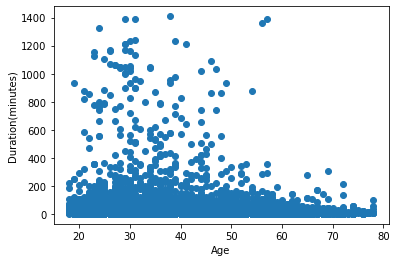

In [66]:
plt.scatter(data = ford_data, x = 'Age', y = 'duration_minutes');
plt.xlabel('Age')
plt.ylabel('Duration(minutes)');

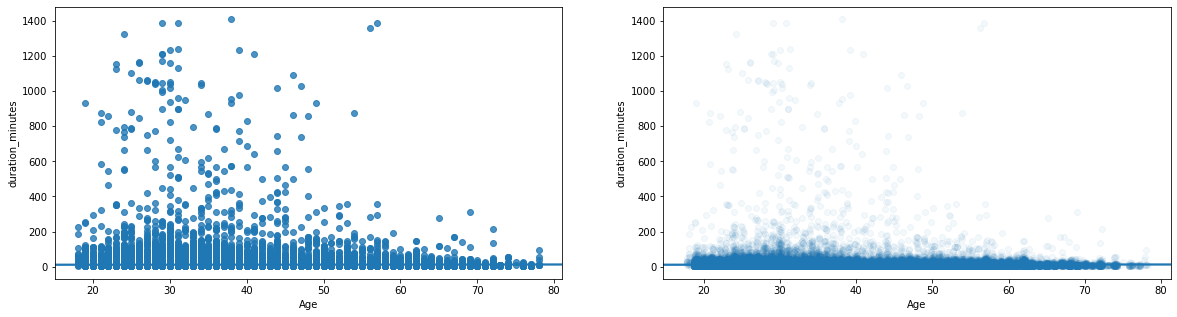

In [76]:
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = ford_data, x = 'Age', y = 'duration_minutes', truncate=False);


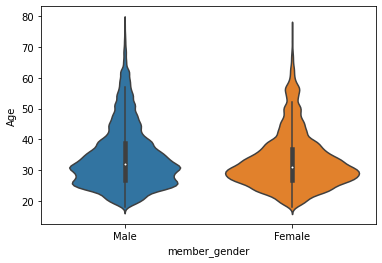

In [78]:
sb.violinplot(data=ford_data, x='member_gender', y='Age');

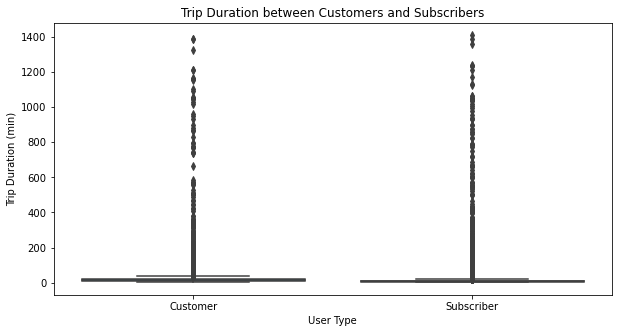

In [109]:
plt.figure(figsize = [10, 5])
sb.boxplot(x='user_type', y='duration_minutes', data = ford_data)

plt.title('Trip Duration between Customers and Subscribers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.show()


<AxesSubplot:xlabel='start_weekday', ylabel='Age'>

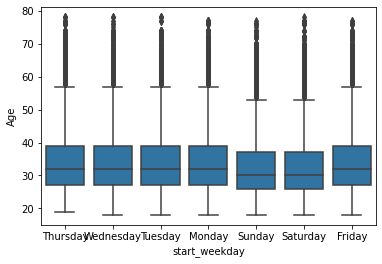

In [84]:
sb.boxplot(data=ford_data, x='start_weekday', y='Age', color=base_color)


In [97]:
ford_data.bike_id.value_counts()

4794    177
4814    169
4450    165
5175    165
5145    164
       ... 
5994      1
6005      1
70        1
4231      1
5067      1
Name: bike_id, Length: 4603, dtype: int64

<AxesSubplot:xlabel='user_type', ylabel='count'>

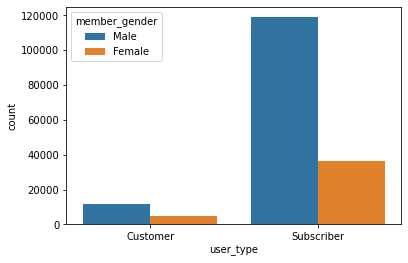

In [87]:
sb.countplot(data = ford_data, x = 'user_type', hue = 'member_gender')

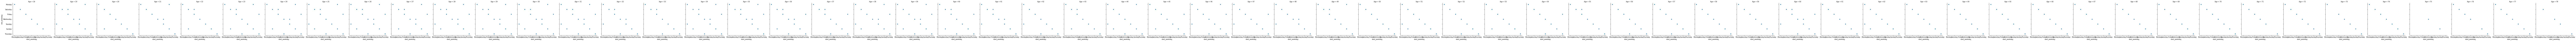

In [102]:
g = sb.FacetGrid(data = ford_data, col = 'Age', height = 4)
g.map(sb.scatterplot, 'start_weekday', 'end_weekday');

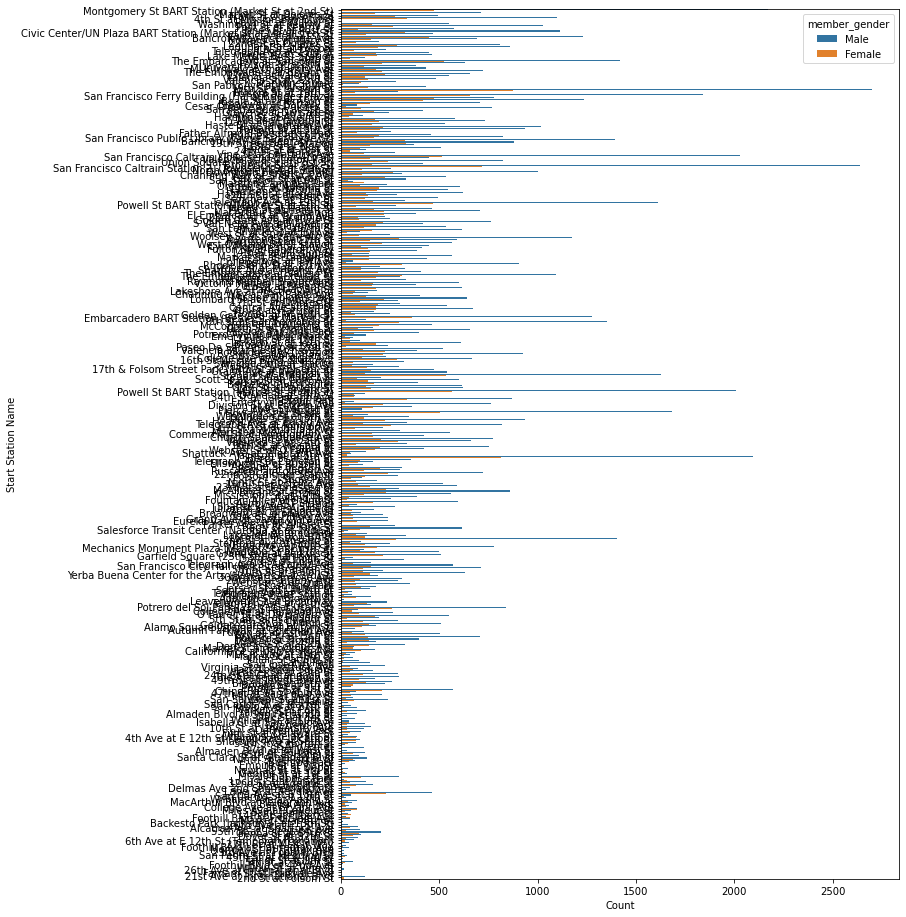

In [90]:
fig = plt.figure(figsize=(10,16))


sb.countplot(data=ford_data, y='start_station_name', hue='member_gender')
   
plt.ylabel('Start Station Name')
plt.xlabel('Count');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

